We will be using the [fashion_mnist dataset](https://www.kaggle.com/zalando-research/fashionmnist)


# Read data sets

In [2]:
import pandas as pd

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Analyze images by plotting

In [3]:
# Lets store the class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 
               'Bag', 'Ankle boot']

In [4]:
#Retrieve the labels and store it in a 1d numpy array
train_labels = train.iloc[:,0].values
print(train_labels.shape)

test_labels = test.iloc[:,0].values
test_labels.shape

(60000,)


(10000,)

In [5]:
# Retrieve the pixels and store it in a 3d numpy array
train_values = train.iloc[:,1:].values
print(train_values.shape)
train_values = train_values.reshape(train_values.shape[0], 28, 28)
print(train_values.shape)

# for the test data set
test_values = test.iloc[:,1:].values
print(test_values.shape)
test_values = test_values.reshape(test_values.shape[0], 28, 28)
print(test_values.shape)

(60000, 784)
(60000, 28, 28)
(10000, 784)
(10000, 28, 28)


Pullover


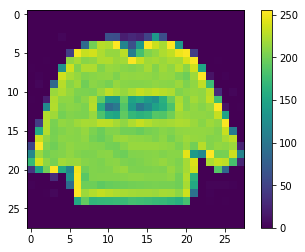

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# Display the first image
print(class_names[train_labels[0]])
plt.figure()
plt.imshow(train_values[0])
plt.colorbar()

# Selecting and Tuning Different Algorithms

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

def select_model(df, labels, model_hyp):
    all_X = df
    all_y = labels

    print(model_hyp["name"])
    print('-'*len(model_hyp['name']))
    grid = GridSearchCV(model_hyp["estimator"],param_grid=model_hyp["hyperparameters"],cv=2)
    grid.fit(all_X,all_y)
    model_hyp["best_params"] = grid.best_params_
    model_hyp["best_score"] = grid.best_score_
    model_hyp["best_model"] = grid.best_estimator_

    print("Best Score: {}".format(model_hyp["best_score"]))
    print("Best Parameters: {}\n".format(model_hyp["best_params"]))

    return model_hyp

In [8]:
#scale the data to 0,1
train_pixels = train.iloc[:,1:]/ 255.0
train_labels = train.iloc[:,0]

test_pixels = test.iloc[:,1:]/ 255.0
test_labels = test.iloc[:,0]

In [ ]:
# speed 8 minutes
model_hyp = {
    "name": "LogisticRegression",
    "estimator": LogisticRegression(),
    # "newton-cg", "lbfgs" support L2 regularization while "liblinear" supports both L1 and L2
    "hyperparameters":
        {
            "solver": ["newton-cg", "lbfgs", "liblinear"]
        }
}

result = select_model(train_pixels,train_labels,model_hyp)
result

# Random Forest

In [10]:
# speed ~1 minute
model = RandomForestClassifier()
model.fit(train_pixels, train_labels)
rf_predictions = model.predict(test_pixels)
cf = np.mean(rf_predictions == test_labels)
print(cf)

0.8582


# Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
# speed ~1 minute
model = DecisionTreeClassifier()
model.fit(train_pixels, train_labels)
predictions = model.predict(test_pixels)
cf = np.mean(predictions == test_labels)
print(cf)

0.7966


# Neural Network 

In [11]:
from sklearn.neural_network import MLPClassifier
# speed ~2 minute
model = MLPClassifier()
model.fit(train_pixels, train_labels)
nn_predictions = model.predict(test_pixels)
cf = np.mean(nn_predictions == test_labels)
print(cf)

0.8895


# Logistic Regression

In [13]:
# speed ~3 minutes
model = LogisticRegression()
model.fit(train_pixels, train_labels)
predictions = model.predict(test_pixels)
cf = np.mean(predictions == test_labels)
print(cf)
accuracy_score(predictions, test_labels, normalize=False)

0.8551


8551

# Linear SVC

In [14]:
# speed ~5 minutes
model = LinearSVC()
model.fit(train_pixels, train_labels)
predictions = model.predict(test_pixels)
cf = np.mean(predictions == test_labels)
print(cf)

0.8496


# Naive Bayes

In [15]:
from sklearn.naive_bayes import BernoulliNB
# speed - <1
model = BernoulliNB()
model.fit(train_pixels, train_labels)
predictions = model.predict(test_pixels)
cf = np.mean(predictions == test_labels)
print(cf)

0.7141


# KNN 

In [9]:
%%time
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(train_pixels, train_labels)
knn_predictions = model.predict(test_pixels)
cf = np.mean(predictions == test_labels)
print(cf)

0.8589
Wall time: 11min 50s


# Stochastic Gradient Descent

In [12]:
%%time
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(train_pixels, train_labels)
gd_predictions = model.predict(test_pixels)
cf = np.mean(predictions == test_labels)
print(cf)

C:\Users\NS-PC\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.8589
Wall time: 3.62 s


# Ensemble

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# speed 8:53 to 9:21 and still did not complete
model = GradientBoostingClassifier()
model.fit(train_pixels, train_labels)
predictions = model.predict(test_pixels)
cf = np.mean(predictions == test_labels)
print(cf)

# Kernel SVM

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. 

This can be a consequence of the following differences:
LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

hinge loss ia a loss  function mostly used in SVMs

In [ ]:
import timeit
from sklearn.svm import SVC
start_time = timeit.default_timer()
print(start_time)
model = SVC(kernel='linear', C=1.0)
model.fit(train_pixels, train_labels)
predictions = model.predict(test_pixels)
cf = np.mean(predictions == test_labels)
print(cf)          

elapsed = timeit.default_timer() - start_time
# speed TOOK TOO LONG so interrupted
elapsed

# Summary

Classifier | Accuracy | Speed
--- | --- |
RandomForestClassifier | .8596 | 1
DecisionTreeClassifier | .7966 | 1
MLPClassifier | .8909 | 2
LogisticRegression | .8551 | 3
LinearSVC | .8496 | 5
GuassianNB | .5914 | <1
MultinomialNB | .6675  | <1
BernoulliNB | .7141 | <1
KNeighborsClassifier | .8589 | 11
SGDClassifier | .8589 | <1

# Analyze Neural Network and Random Forest

Which images did it not classify?
Are they the same set of images?

In [104]:
test_labels.head(10)

0    0
1    1
2    2
3    2
4    3
5    2
6    8
7    6
8    5
9    0
Name: label, dtype: int64

In [107]:
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [106]:
nn_predictions[0:10]

array([0, 1, 2, 2, 2, 6, 8, 6, 5, 0], dtype=int64)

In [130]:
#create a test labels dataframe with the original indexes as columns
test_values = pd.DataFrame()
test_values['label'] = test.iloc[:,0]
test_values['i_dx'] = test_values.index
test_values.head()

,label,i_dx
0,0,0
1,1,1
2,2,2
3,2,3
4,3,4


In [148]:
# get unmatched labels from random Forest
unmatched_recs_rf = pd.DataFrame()
unmatched_recs_rf['idx'] = test_values[test_values['label'] != rf_predictions].index
unmatched_recs_rf['label'] = rf_predictions[unmatched_recs_rf['idx']]
unmatched_recs_rf.head(10)

,idx,label
0,5,6
1,12,2
2,16,4
3,30,7
4,51,4
5,59,3
6,72,2
7,79,2
8,91,6
9,92,4


In [149]:
# get unmatched labels from neural network
unmatched_recs_nn = pd.DataFrame()
unmatched_recs_nn['idx'] = test_values[test_values['label'] != nn_predictions].index
unmatched_recs_nn['label'] = nn_predictions[unmatched_recs_nn['idx']]
unmatched_recs_nn.head(10)

,idx,label
0,4,2
1,5,6
2,38,6
3,43,4
4,51,4
5,59,3
6,73,0
7,79,3
8,83,4
9,91,6


In [171]:
# Which ones did both fail to predict
matches = pd.DataFrame()
matches = unmatched_recs_nn[unmatched_recs_nn['idx'].isin(unmatched_recs_rf['idx'])]
matches

,idx,label
1,5,6
4,51,4
5,59,3
7,79,3
9,91,6
10,94,6
11,95,4
14,119,3
16,137,6
17,138,6


In [172]:
# Find the lables most commonly mis-classified
matches.head()
matches['label'].value_counts()

4    157
2    118
6    114
0    103
3     75
9     33
7     27
8     18
1     16
5     10
Name: label, dtype: int64

In [174]:
# labels that are most often mis-classified
print(class_names[4],class_names[2],class_names[6],class_names[0])

Coat Pullover Shirt T-shirt/top
